### 1-a)

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader  as fdr
import cvxpy as cp

C:\ana3\envs\t_f2.2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### 1-b)

In [17]:
samsung_df = fdr.DataReader('005930', '2017')
hyundai_df = fdr.DataReader('005380', '2017')
sk_hynix_df = fdr.DataReader('000660', '2017')
kakao_df = fdr.DataReader('035720', '2017')
naver_df = fdr.DataReader('035420', '2017')

In [18]:
close_df = pd.DataFrame({'Samsung':samsung_df['Close'],
                      'Hyundai':hyundai_df['Close'],
                      'SK hynix':sk_hynix_df['Close'],
                        'KaKao' : kakao_df['Close'],
                        'Naver':naver_df['Close']})

In [19]:
close_df

,Samsung,Hyundai,SK hynix,KaKao,Naver
Date,,,,,
2017-01-02,36100,150000,45800,15394,155620
2017-01-03,36480,153000,47250,16057,153617
2017-01-04,36160,154000,46500,16920,162230
2017-01-05,35560,153500,46950,16860,158424
2017-01-06,36200,151000,48000,16800,160026
...,...,...,...,...,...
2021-05-28,80100,232000,125000,122000,358000
2021-05-31,80500,235000,127000,123000,362500
2021-06-01,80600,237000,128500,127000,367000


In [4]:
close_df_2018 = close_df["2017-12-31":"2019-01-01"]
close_df_2019 = close_df["2018-12-31":"2020-01-01"]
close_df_2020 = close_df["2019-12-31":"2021-01-01"]

### 1-c)

In [5]:
#2018
log_df_2018 = np.log(close_df_2018/close_df_2018.shift(1))
log_df_2018.loc[0:1,list(log_df_2018.columns)]=0.0 # shift1하면서 생긴 none 데이터 결측치 처리

mu_2018 = log_df_2018.mean() * len(log_df_2018) #annualization 데이터가 1년단위면 길이만큼 곱해줌, 1년 단위가 아니면 특정 숫자 곱해줌
sigma_2018 = log_df_2018.cov() * len(log_df_2018) # daily T=251, monthly T=12, weekly T=52

<ipython-input-5-2c9d58a29e84>:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  log_df_2018.loc[0:1,list(log_df_2018.columns)]=0.0 # shift1하면서 생긴 none 데이터 결측치 처리


In [6]:
mu_2018

Samsung    -0.276378
Hyundai    -0.232383
SK hynix   -0.235954
KaKao      -0.352336
Naver      -0.373546
dtype: float64

In [7]:
sigma_2018

,Samsung,Hyundai,SK hynix,KaKao,Naver
Samsung,0.069588,0.003577,0.060458,0.030400,0.024737
Hyundai,0.003577,0.089869,-0.004189,0.024834,0.011415
SK hynix,0.060458,-0.004189,0.124256,0.034097,0.016693
KaKao,0.030400,0.024834,0.034097,0.131883,0.048776
Naver,0.024737,0.011415,0.016693,0.048776,0.090944


In [8]:
#2019
log_df_2019 = np.log(close_df_2019/close_df_2019.shift(1))
log_df_2019.loc[0:1,list(log_df_2019.columns)]=0.0 # shift1하면서 생긴 none 데이터 결측치 처리

mu_2019 = log_df_2019.mean() * len(log_df_2019) #annualization 데이터가 1년단위면 길이만큼 곱해줌, 1년 단위가 아니면 특정 숫자 곱해줌
sigma_2019 = log_df_2019.cov() * len(log_df_2019) # daily T=251, monthly T=12, weekly T=52

<ipython-input-8-9ad3001e2ffe>:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  log_df_2019.loc[0:1,list(log_df_2019.columns)]=0.0 # shift1하면서 생긴 none 데이터 결측치 처리


In [9]:
mu_2019

Samsung     0.364643
Hyundai     0.055451
SK hynix    0.440063
KaKao       0.408732
Naver       0.457747
dtype: float64

In [10]:
sigma_2019

,Samsung,Hyundai,SK hynix,KaKao,Naver
Samsung,0.051675,0.012462,0.055106,0.008036,0.009020
Hyundai,0.012462,0.055022,0.017534,0.005146,0.011152
SK hynix,0.055106,0.017534,0.120113,0.007239,0.010537
KaKao,0.008036,0.005146,0.007239,0.077861,0.022141
Naver,0.009020,0.011152,0.010537,0.022141,0.101445


In [11]:
#2020
log_df_2020= np.log(close_df_2020/close_df_2020.shift(1))
log_df_2020.loc[0:1,list(log_df_2020.columns)]=0.0 # shift1하면서 생긴 none 데이터 결측치 처리

mu_2020 = log_df_2020.mean() * len(log_df_2020) #annualization 데이터가 1년단위면 길이만큼 곱해줌, 1년 단위가 아니면 특정 숫자 곱해줌
sigma_2020 = log_df_2020.cov() * len(log_df_2020) # daily T=251, monthly T=12, weekly T=52

<ipython-input-11-b44b393f61e4>:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  log_df_2020.loc[0:1,list(log_df_2020.columns)]=0.0 # shift1하면서 생긴 none 데이터 결측치 처리


In [12]:
mu_2020

Samsung     0.383486
Hyundai     0.486811
SK hynix    0.224199
KaKao       0.937707
Naver       0.471714
dtype: float64

In [13]:
sigma_2020

,Samsung,Hyundai,SK hynix,KaKao,Naver
Samsung,0.107974,0.088395,0.103681,0.045781,0.049261
Hyundai,0.088395,0.231081,0.096193,0.048717,0.053302
SK hynix,0.103681,0.096193,0.165009,0.058325,0.065012
KaKao,0.045781,0.048717,0.058325,0.161585,0.123059
Naver,0.049261,0.053302,0.065012,0.123059,0.155526


### 2-a)

In [14]:
mu_2018 = mu_2018.values
mu_2018 = mu_2018.reshape((5,))

w_2018 = cp.Variable(5)

lambda_ = 0.1 

ret_2018 = mu_2018.T * w_2018
risk_2018 = cp.quad_form(w_2018,sigma_2018)

obj_2018 =cp.Minimize(risk_2018-lambda_*ret_2018)

prob_2018 = cp.Problem(obj_2018,
                 [sum(w_2018)==1, 
                 w_2018>=0])

prob_2018.solve()
print('expected return', mu_2018.dot(w_2018.value)) # expected retrun Mu^T * w^*(optimal one)
print('standard deviation',np.sqrt(w_2018.value.dot(sigma_2018).dot(w_2018.value)))
print('weights', w_2018.value)

expected return -0.27068996187790695
standard deviation 0.18766886625011261
weights [2.95450148e-01 3.85809049e-01 1.43074397e-01 3.59375832e-23
 1.75666406e-01]


C:\ana3\envs\t_f2.2\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


In [16]:
mu_2018[0]

-0.2763781126779285

### 2-b)

In [11]:
gain_list = []
for i in range(5):
    gap_price = close_df_2020.iloc[-1][i] - close_df_2019.iloc[0][i] # (20년 가격 - 19년 가격)
    return_pct = (gap_price / close_df_2019.iloc[0][i]) # (20년 가격 - 19년 가격)/(19년 가격)
    print(return_pct)
    #gain_list.append(return_pct * w_2018.value[i]*100) # 수익률 x 비중 
    gain_list.append((1+return_pct) * w_2018.value[i]*100) 

1.0903225806451613
0.6842105263157895
0.9554455445544554
2.8186391833146094
1.478813559322034


In [12]:
# 2019년 1월1일에 100$ 집어 넣어서, 2020년 12월31일에 198$ 됬음
all_gain = 0
for rtn in gain_list:
    all_gain += rtn
all_gain

198.2588238597681

In [13]:
all_ann_rtn = np.sqrt(all_gain/100)-1 
all_ann_rtn

0.4080441181290029

In [82]:
# annual return standard deviation
days = int(len(log_df_2019) + len(log_df_2020))/2

concat_df = pd.concat([log_df_2019,log_df_2020])
sdv = np.sqrt(w_2018.value.dot(concat_df.cov()*days).dot(w_2018.value))
sdv

0.2623031924043395

### 2-c)

In [16]:
invested_money = []
for w in w_2018.value:
    invested_money.append(100*w)
invested_money

[29.545014805660806,
 38.5809048824135,
 14.3074397146635,
 2.9849645044896876e-21,
 17.566640597262197]

In [17]:
invested_ = {}
close_df = close_df['2018-12-28':'2020-12-31']
log_close = np.log(close_df/close_df.shift(1))
log_close = log_close.dropna()
for i in range(len(log_close)):
    invested_money[0] = invested_money[0] * (1+log_close['Samsung'].iloc[i])
    invested_money[1] = invested_money[1] * (1+log_close['Hyundai'].iloc[i])
    invested_money[2] = invested_money[2] * (1+log_close['SK hynix'].iloc[i])
    invested_money[3] = invested_money[3] * (1+log_close['KaKao'].iloc[i])
    invested_money[4] = invested_money[4] * (1+log_close['Naver'].iloc[i])
    invested_[i] = invested_money[0] +invested_money[1] +invested_money[2] +invested_money[3] + invested_money[4] 

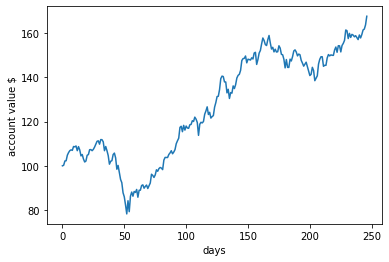

In [86]:
import matplotlib.pyplot as plt
plt.plot(range(len(invested_)), invested_.values())
plt.xlabel('days') 
plt.ylabel('account value $')
plt.show()

### 2-d)

In [20]:
mu_2019 = mu_2019.values
mu_2019 = mu_2019.reshape((5,))

w_2019 = cp.Variable(5)

lambda_ =0.1 

ret_2019 = mu_2019.T * w_2019
risk_2019 = cp.quad_form(w_2019,sigma_2019)

obj_2019 =cp.Minimize(risk_2019-lambda_*ret_2019)

prob_2019 = cp.Problem(obj_2019,
                 [sum(w_2019)==1, 
                 w_2019>=0])

prob_2019.solve()
print('expected return', mu_2019.dot(w_2019.value))
print('standard deviation',np.sqrt(w_2019.value.dot(sigma_2019).dot(w_2019.value)))

expected return 0.381769478878326
standard deviation 0.1703546643717708


C:\ana3\envs\t_f2.2\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


In [21]:
w_2019.value

array([0.41840464, 0.05673786, 0.02987155, 0.27886979, 0.21611616])

In [22]:
gain_list = []
for i in range(5):
    gap_price = close_df_2020.iloc[-1][i] - close_df_2020.iloc[0][i] # (20년 1월 가격 - 20년  12월 가격)
    return_pct = (gap_price / close_df_2020.iloc[0][i])# (20년 1월 가격 - 20년  12월 가격)/(19년 가격)
    print(return_pct)
    gain_list.append(return_pct * w_2019.value[i]*100)# 수익률 x 비중 

0.4673913043478261
0.6271186440677966
0.25131995776135163
1.5541180698487373
0.6027397260273972


In [23]:
# 2020년 1월1일에 100$ 집어 넣어서, 2020년 12월31일에 180$ 됬음
all_gain = 0
for rtn in gain_list:
    all_gain += rtn
current_money = 100 + all_gain # 100은 원래 자본, all_gain은 수익
current_money

180.23057498946946

In [24]:
all_ann_rtn = (current_money/100)-1 
all_ann_rtn

0.8023057498946946

In [84]:
# annual return standard deviation
days = int(len(log_df_2020))

sdv = np.sqrt(w_2019.value.dot(log_df_2020.cov()*days).dot(w_2019.value))
sdv

0.29295591875839316

In [26]:
invested_money = []
for w in w_2019.value:
    invested_money.append(100*w)
invested_money

[41.84046422127436,
 5.673785625555312,
 2.987155495982261,
 27.886979024856384,
 21.611615632331677]

In [27]:
invested_ = {}
for i in range(1,len(log_df_2020)):
    invested_money[0] = invested_money[0] * (1+log_df_2020['Samsung'].iloc[i])
    invested_money[1] = invested_money[1] * (1+log_df_2020['Hyundai'].iloc[i])
    invested_money[2] = invested_money[2] * (1+log_df_2020['SK hynix'].iloc[i])
    invested_money[3] = invested_money[3] * (1+log_df_2020['KaKao'].iloc[i])
    invested_money[4] = invested_money[4] * (1+log_df_2020['Naver'].iloc[i])
    invested_[i] = invested_money[0] +invested_money[1] +invested_money[2] +invested_money[3] + invested_money[4] 

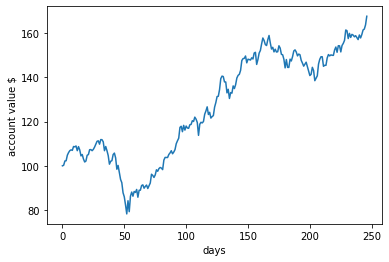

In [85]:
plt.plot(range(len(log_df_2020)-1), invested_.values())
plt.xlabel('days') 
plt.ylabel('account value $')
plt.show()